In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [3]:
data = pd.read_csv(r'student_resource\dataset\train.csv')
data.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [17]:
# get stats of the data
print("no of classes and counts in each class")
print(data['entity_name'].value_counts())

print("\n\ncounts in group id")
print("types of group id", len(data['group_id'].unique()))
print(data['group_id'].value_counts())


# check for missing values
print("\n\nmissing values in the data")
print(data.isnull().sum())

# check for duplicate values
print("\n\nno of duplicate values in the data")
print(data.duplicated().sum())





no of classes and counts in each class
entity_name
item_weight                      102786
depth                             45127
width                             44183
height                            43597
voltage                            9466
wattage                            7755
item_volume                        7682
maximum_weight_recommendation      3263
Name: count, dtype: int64


counts in group id
types of group id 750
group_id
459516    9458
752266    9063
281678    6137
308856    5437
731432    4741
          ... 
997333       2
656506       2
314298       2
178031       1
226428       1
Name: count, Length: 750, dtype: int64


missing values in the data
image_link      0
group_id        0
entity_name     0
entity_value    0
dtype: int64


no of duplicate values in the data
0



 group id: 101697
entity_name
depth    35
width    19
Name: count, dtype: int64
['width' 'depth']
Axes(0.125,0.11;0.775x0.77)

 group id: 104874
entity_name
depth    82
width    54
Name: count, dtype: int64
['width' 'depth']
Axes(0.125,0.11;0.775x0.77)

 group id: 106003
entity_name
height    113
width      67
Name: count, dtype: int64
['width' 'height']
Axes(0.125,0.11;0.775x0.77)

 group id: 107694
entity_name
item_weight    913
depth          160
width          110
Name: count, dtype: int64
['item_weight' 'depth' 'width']
Axes(0.125,0.11;0.775x0.77)

 group id: 107915
entity_name
height         14
depth          10
item_weight     4
width           1
Name: count, dtype: int64
['item_weight' 'width' 'depth' 'height']
Axes(0.125,0.11;0.775x0.77)

 group id: 108478
entity_name
height    36
depth     29
width     17
Name: count, dtype: int64
['width' 'depth' 'height']
Axes(0.125,0.11;0.775x0.77)

 group id: 110833
entity_name
width     7
height    7
depth     5
Name: count, dtype: int6

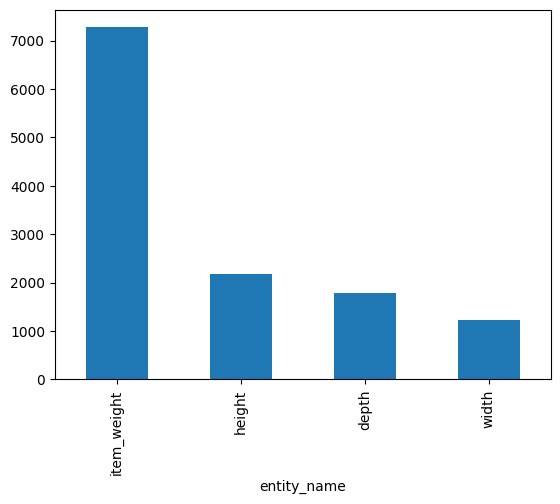

In [15]:
#for each group id, if there are multiple entity names, then plot them

grouped = data.groupby('group_id')
for name, group in grouped:
    if len(group['entity_name'].unique()) > 1:
        print(f"\n group id: {name}")
        print(group['entity_name'].value_counts())
        print(group['entity_name'].unique())
        print(group['entity_name'].value_counts().plot(kind='bar'))

# check for correlation between the features
# correlation = data.corr()
# plt.figure(figsize=(10,10))
# sns.heatmap(correlation, annot=True)
plt.show()

